In [2]:
import networkx as nx

In [27]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (3, 4)])

In [30]:
G.number_of_nodes(), G.number_of_edges()

(4, 2)

#### Karate club graph

In [31]:
G = nx.karate_club_graph()


In [32]:
import matplotlib.pyplot as plt



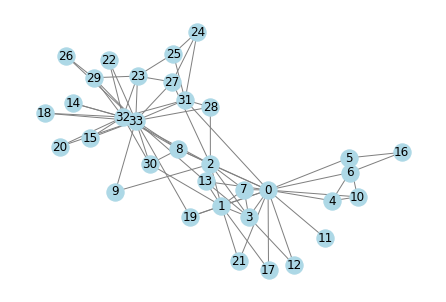

In [37]:
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")

In [38]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [42]:
G.degree()[33], G.degree(33)

(17, 17)

In [44]:
G.number_of_nodes(), G.number_of_edges()

(34, 78)

In [46]:
G.degree(0) is G.degree()[0]

True

### Random Graphs

In [67]:
from scipy.stats import bernoulli

N = 20
p = 0.2

# create an empty graph
# add all N nodes in the graph
# loop over all pairs of nodes, add an edge with prob 'p'

def er_graph(N, p):
    """Generate ER graph."""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G

            

In [68]:
G.number_of_nodes()

20

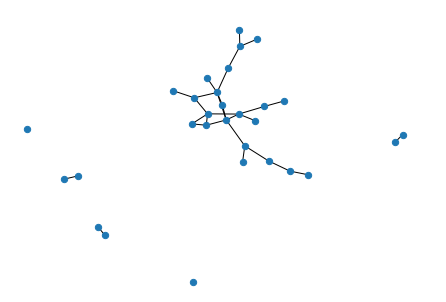

In [78]:
nx.draw(er_graph(30, 0.08), node_size=40,)

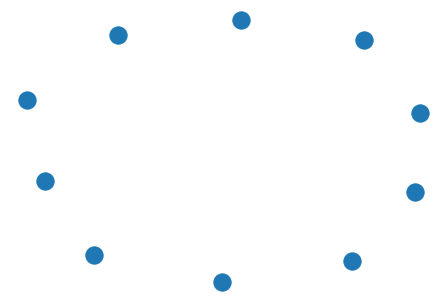

In [91]:
nx.draw(er_graph(10, 0))

In [96]:
def plot_degree_dist(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Dgree distribution")

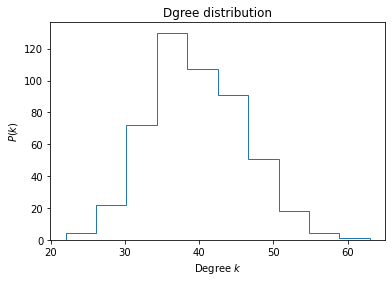

In [101]:
G = er_graph(500, 0.08)
plot_degree_dist(G)

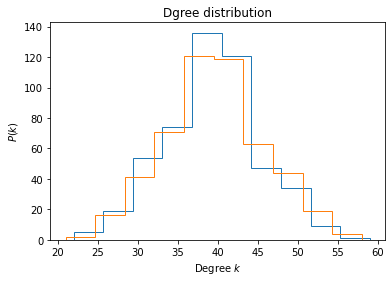

In [104]:
G2 = er_graph(500, 0.08)
plot_degree_dist(G2)
G3 = er_graph(500, 0.08)
plot_degree_dist(G3)

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

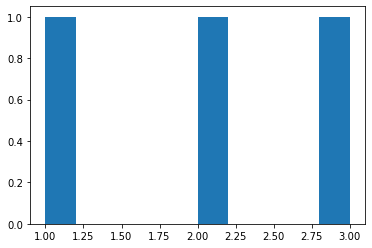

In [105]:
D = {1:1, 2:2, 3:3}
plt.hist(D)

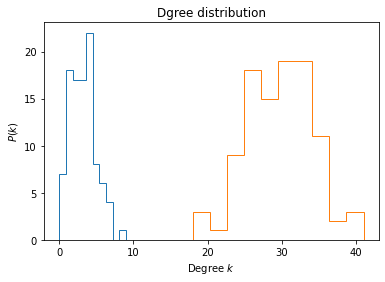

In [108]:
G4 = er_graph(100, 0.03)
plot_degree_dist(G4)
G5 = er_graph(100, 0.30)
plot_degree_dist(G5)

### 4.3.6: Descriptive Statistics of Empirical Social Networks

In [114]:
import numpy as np
A1 = np.loadtxt("./adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("./adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)


In [116]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %d" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))
    

In [118]:
basic_net_stats(G1)

Number of nodes: 843
Number of edges: 3405
Average degree: 8.08


In [119]:
basic_net_stats(G2)

Number of nodes: 877
Number of edges: 3063
Average degree: 6.99


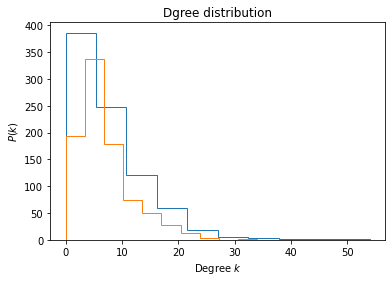

In [122]:
plot_degree_dist(G1)
plot_degree_dist(G2)

### 4.3.7: Finding the Largest Connected Component

In [136]:
gen = nx.connected_components(G1)

In [143]:
g = gen.__next__()
len(g)

1

In [145]:
len(G1), G1.number_of_nodes()

(843, 843)